In [1]:
import json
import re

import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("bench.json") as f:
    data = json.load(f)["benchmarks"]
data

[{'name': 'BM_Minimize<tb::NaiveMinimize>/1000000',
  'family_index': 0,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::NaiveMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 3,
  'real_time': 242071226.8600861,
  'cpu_time': 242036556.33333334,
  'time_unit': 'ns'},
 {'name': 'BM_Minimize<tb::DequeMinimize>/1000000',
  'family_index': 1,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::DequeMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 30,
  'real_time': 23464111.90616588,
  'cpu_time': 23461343.733333323,
  'time_unit': 'ns'},
 {'name': 'BM_Minimize<tb::InplaceMinimize>/1000000',
  'family_index': 2,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::InplaceMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 33,
  'r

In [3]:
with open("bench.json") as f:
    data = json.load(f)

df_benchmarks = pl.from_dicts(
    [
        {
            **run,
            "n_bases": int(run["name"].split("/")[1]),
            "function": re.search(r"(?<=<)(.*?)(?=>)", run["name"]).group(),
        }
        for run in data["benchmarks"]
    ]
)

df_benchmarks

name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,n_bases,function
str,i64,i64,str,str,i64,i64,i64,i64,f64,f64,str,i64,str
"""BM_Minimize<tb::NaiveMinimize>…",0,0,"""BM_Minimize<tb::NaiveMinimize>…","""iteration""",1,0,1,3,2.4207e8,2.4204e8,"""ns""",1000000,"""tb::NaiveMinimize"""
"""BM_Minimize<tb::DequeMinimize>…",1,0,"""BM_Minimize<tb::DequeMinimize>…","""iteration""",1,0,1,30,2.3464e7,2.3461e7,"""ns""",1000000,"""tb::DequeMinimize"""
"""BM_Minimize<tb::InplaceMinimiz…",2,0,"""BM_Minimize<tb::InplaceMinimiz…","""iteration""",1,0,1,33,2.1141e7,2.1138e7,"""ns""",1000000,"""tb::InplaceMinimize"""
"""BM_Minimize<tb::RingMinimize>/…",3,0,"""BM_Minimize<tb::RingMinimize>/…","""iteration""",1,0,1,27,2.6159e7,2.6155e7,"""ns""",1000000,"""tb::RingMinimize"""
"""BM_Minimize<tb::ArgMinMinimize…",4,0,"""BM_Minimize<tb::ArgMinMinimize…","""iteration""",1,0,1,32,2.1883e7,2.1880e7,"""ns""",1000000,"""tb::ArgMinMinimize"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""BM_Minimize<tb::ArgMinRecovery…",12,0,"""BM_Minimize<tb::ArgMinRecovery…","""iteration""",1,0,1,81,8.6470e6,8.6458e6,"""ns""",1000000,"""tb::ArgMinRecoveryUnrolledMini…"
"""BM_Minimize<tb::NtHashArgMinRe…",13,0,"""BM_Minimize<tb::NtHashArgMinRe…","""iteration""",1,0,1,64,1.0920e7,1.0919e7,"""ns""",1000000,"""tb::NtHashArgMinRecoveryMinimi…"
"""BM_Minimize<tb::NtHashPrecompu…",14,0,"""BM_Minimize<tb::NtHashPrecompu…","""iteration""",1,0,1,68,1.0303e7,1.0303e7,"""ns""",1000000,"""tb::NtHashPrecomputedArgMinRec…"


In [4]:
x_ticks = df_benchmarks["n_bases"].unique().sort()
y_ticks = df_benchmarks["real_time"].unique().sort().to_numpy()

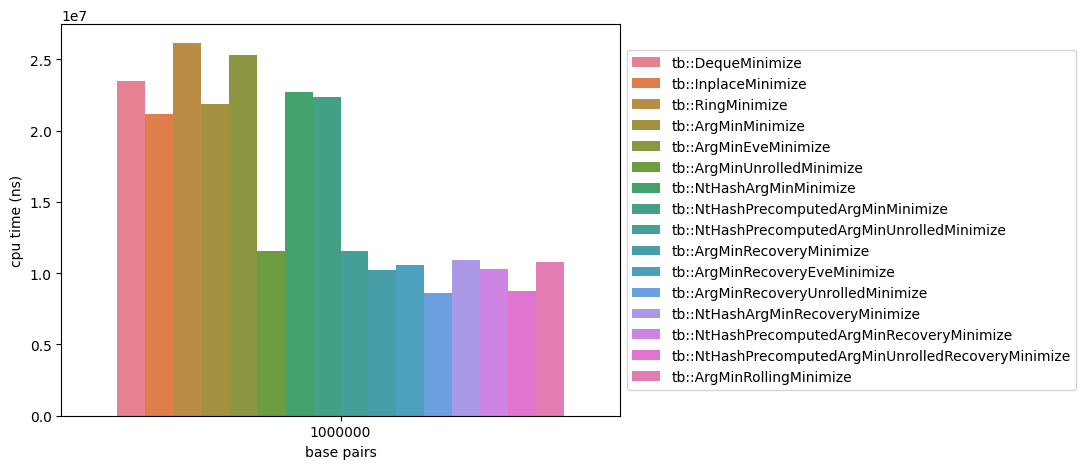

In [5]:
fig = sns.barplot(
    df_benchmarks.filter(pl.col("function") != "tb::NaiveMinimize"),
    x="n_bases",
    y="cpu_time",
    hue="function",
)
plt.tight_layout()
fig.set_ylabel("cpu time (ns)")
fig.set_xlabel("base pairs")
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [6]:
print(
    df_benchmarks.group_by("function")
    .agg(
        (pl.col("cpu_time") / pl.col("n_bases")).first().alias("avg ns per bp"),
    )
    .sort("avg ns per bp", descending=True)
    .to_pandas()
    .to_markdown(index=False)
)

| function                                            |   avg ns per bp |
|:----------------------------------------------------|----------------:|
| tb::NaiveMinimize                                   |       242.037   |
| tb::RingMinimize                                    |        26.1555  |
| tb::ArgMinEveMinimize                               |        25.3406  |
| tb::DequeMinimize                                   |        23.4613  |
| tb::NtHashArgMinMinimize                            |        22.7416  |
| tb::NtHashPrecomputedArgMinMinimize                 |        22.3514  |
| tb::ArgMinMinimize                                  |        21.8799  |
| tb::InplaceMinimize                                 |        21.138   |
| tb::NtHashPrecomputedArgMinUnrolledMinimize         |        11.5672  |
| tb::ArgMinUnrolledMinimize                          |        11.5261  |
| tb::NtHashArgMinRecoveryMinimize                    |        10.919   |
| tb::ArgMinRollingMinimize           